## 3-1. K-최근접 이웃 회귀
#### 학습 목표 
- 지도 학습의 한 종류인 회귀 문제를 이해하고, K-최근접 이웃 알고리즘을 사용해 농어의 무게를 예측하는 회귀 문제를 풀어보자

### 1. K-최근접 이웃 회귀
- 지도 학습 알고리즘은 크게 분류(classification)와 회귀(regression)로 나뉜다.
- 샘플을 몇 개의 클래스 중 하나로 분류하는 문제가 분류 문제였다면, 회귀는 임의의 어떤 숫자를 에측하는 문제이다.(예를 들면 경제 성장률 예측, 수요 예측, 배달 도착시간 예측 등 모두 회귀 문제이다.)
- 회귀는 정해진 클래스가 없고 임의의 수치를 출력한다.

#### K-최근접 이웃 분류와 K-최근접 이웃 회귀의 차이 
- K-최근접 이웃 분류 
    - K-최근접 이웃 분류 알고리즘은 간단하다, 예측하려는 샘플에 가장 가까운 샘플 K개를 선택한다, 그다음 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플 클래스로 예측하는 것이다.
- K-최근접 이웃 회귀
    - K-최근접 이웃 회귀도 간단하다, 분류와 똑같이 예측하려는 샘플에 가장 가까운 샘플 K개를 선택 한다. 
    - 하지만 분류와 다른 점은 회귀이기 때문에 이웃한 샘플의 타깃은 어떤 클래스가 아니라 임의의 수치이다. 이 수치들의 평균을 구하면 된다.
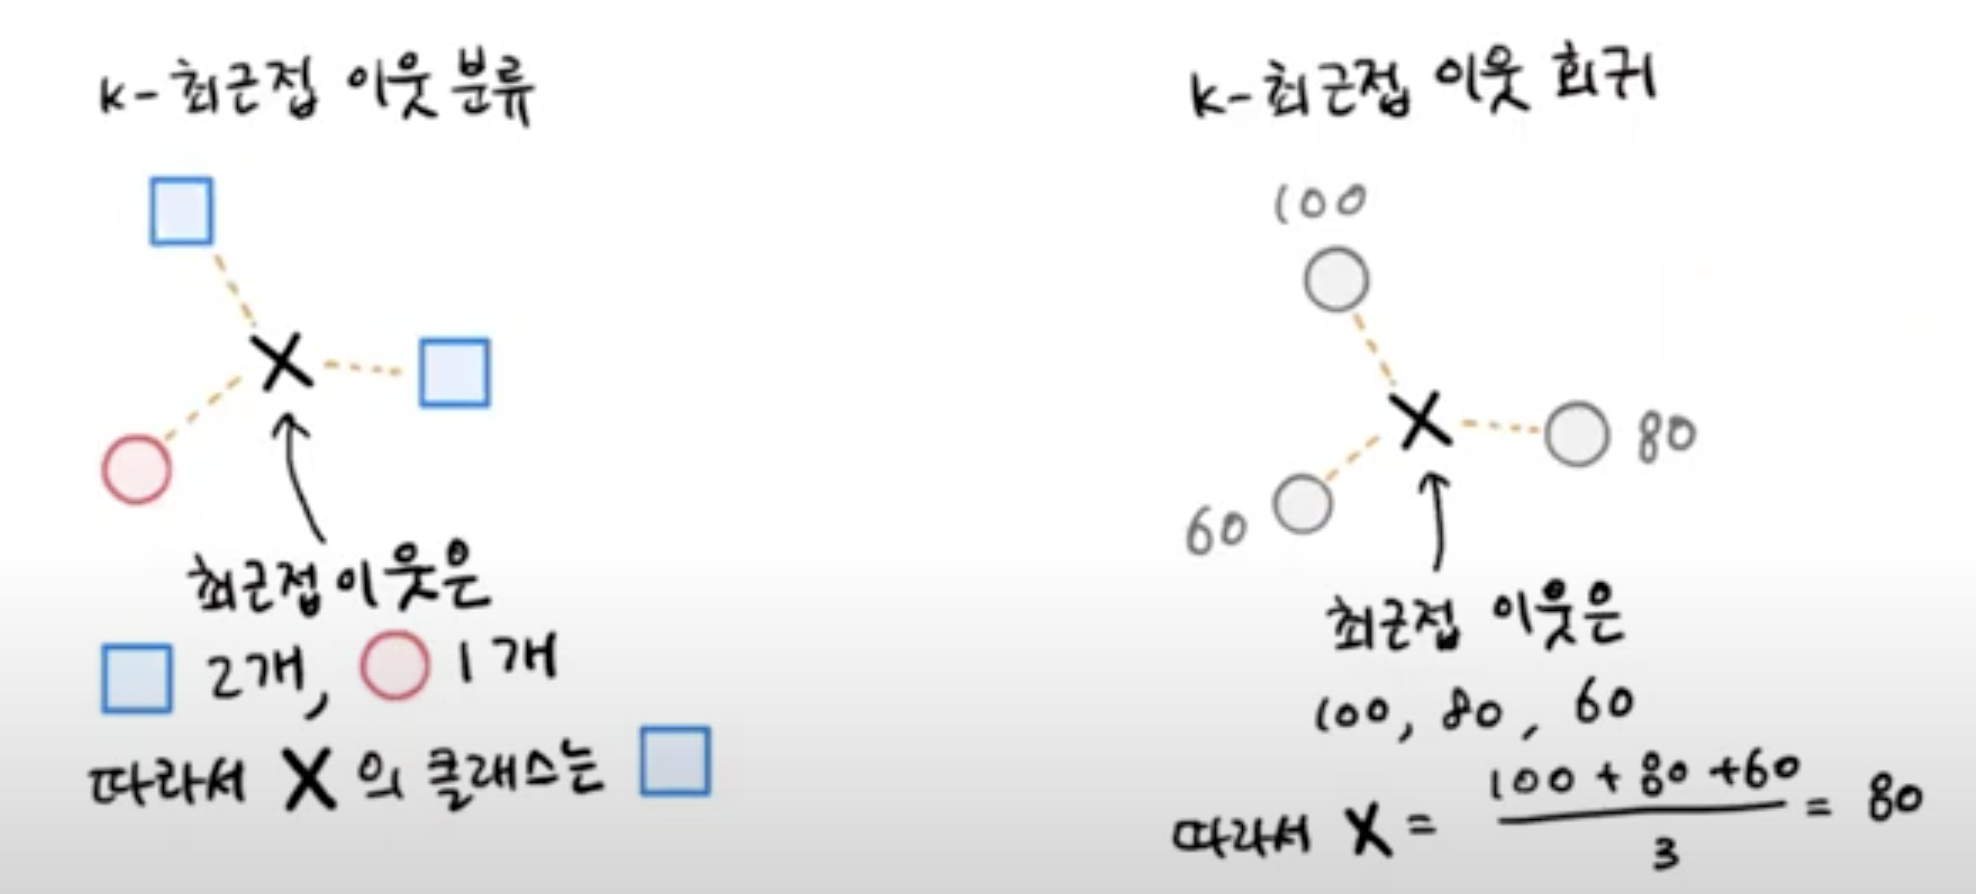

### 2. 데이터 준비 
- 농어 데이터를 준비한다. (파이썬 리스트가 아닌 넘파이를 이용하여)

In [5]:
# 데이터 준비 
import numpy as np   # 넘파이 패키지 임포트 

# 농어 길이 데이터 
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0,
    22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5, 27.5, 
    28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0,
    42.0, 43.0, 43.0, 43.5, 44.0]
)

# 농어 무게 데이터 
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 120.0,
    130.0, 135.0, 110.0, 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 300.0,
    260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
    820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0]
)

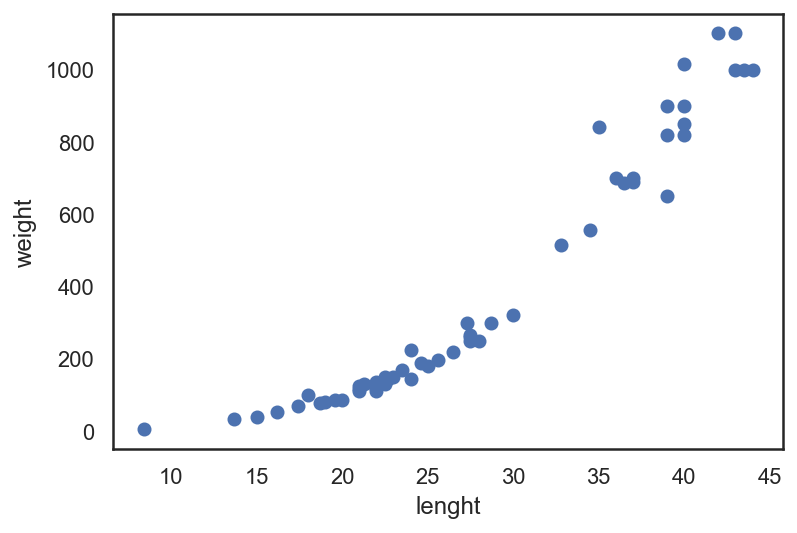

In [8]:
# 데이터 세트를 이용하여 산점도 그래프 나타내기 
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight) # x축(feature data) - 농어 길이 / y축(target data) - 농어 무게 
plt.xlabel('lenght')  
plt.ylabel('weight')
plt.show()

- 산점도 그래프를 나타낸 결과 당연한 이야기지만 길이가 커짐에 따라 무게도 늘어남을 알 수 있다.

In [9]:
# sklearn을 이용하여 train, test set 데이터를 나누기 - 책과 동일한 결과를 위해 random_state 42로 지정
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

- 사이킷런에서 사용할 훈련 세트는 2차원 배열이어야 한다. 하지만 perch_length가 1차원 배열이기 때문에 이를 나눈 train_input, test_input도 1차원 배열이다.
- 이런 1차원 배열을 아래 그림과 같이, 1개의 열이 있는 2차원 배열로 바꿔줘야 한다.
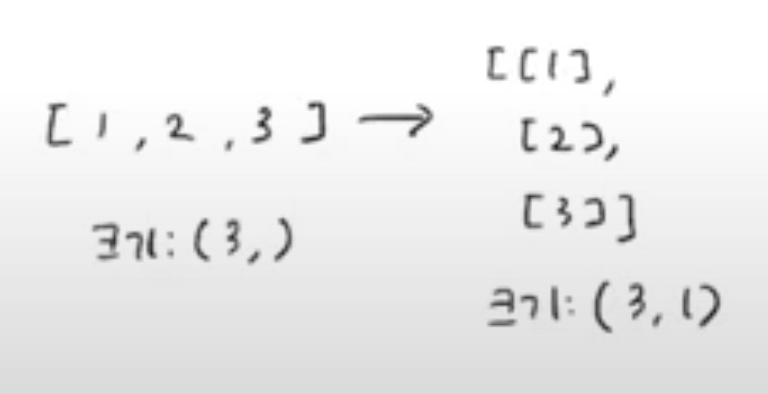

- 파이썬에서 1차원 배열의 크기는 원소가 1개인 튜플로 나타난다. 예를 들어 [1, 2, 3]의 크기는 (3,), 이를 2차원 배열로 만들기 위해 억지로 하나의 열을 추가 시키면 크기가 (3,1)이 된다. 배열을 나타내는 방식만 달라졌을 뿐 배열에 있는 원소의 개수는 동일하게 3개이다.

#### reshape 함수 활용 
- chapter2에서는 2개의 특성을 사용했기 때문에 자연스럽게 열이 2개인 2차원 배열을 사용했었다, 이번 예제에서는 특성을 1개만 사용하므로 수동으로 2차원 배열을 만들어야 한다. 
- 넘파일 배열 크기를 바꿀 수 있는 reshape() 메서드를 이용

In [10]:
# 예제 - (4,) 배열임을 확인 
test_array = np.array([1,2,3,4])
print(test_array, test_array.shape)

[1 2 3 4] (4,)


In [11]:
# (4,) 배열은 reshape() 매서드를 이용하여 (2,2) 크기로 바꾸기 
test_array = test_array.reshape(2,2)
print(test_array, test_array.shape)

[[1 2]
 [3 4]] (2, 2)


In [12]:
# 만약 지정한 크기와 원본 배열의 원소 개수가 다르면 에러가 발생 -> 결론 다르면 안됨.
test_array = test_array.reshape(2,3)

ValueError: cannot reshape array of size 4 into shape (2,3)

- 이제 train_input과 test_input을 2차원 배열로 바꿔 보자. 
- train_input 크기는 (42, )이다. 이를 2차워너 배열인 (42,1)로 바꾸려면 train_input.reshape(42,1)과 같이 사용해도 되지만, 넘파이에서는 배열의 크기를 자동으로 지정하는 기능을 제공한다. 크기에 -1을 지정하면 나머지 원소 개수로 모두 채우라는 의미이다.
- 예를 들어 첫 번째 크기를 나머지 원소 개수로 채우고(-1), 두 번째 크기를 1로 하려면 (1) -> trian_input.reshape(-1,1)

In [13]:
# 2차원 배열로 변경 - (42,) -> (42,1) / (14,) -> (14,1)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


- 2차원 배열로 성공적으로 변환하였다, 위와 같은 방법을 사용하면 배열의 전체 원소 개수를 매번 외우지 않아도 되므로 편리하다.

## 3. 결정계수 (R2 score)
- 사이킷 런에서는 K-최근접 이웃 회귀 알고리즘을 구현한 클래스는 KNeighborsRegressor 이다. 
- KNeighborsRegressor 클래스의 사용법은 KNeighborsClassifier와 매우 비슷하다.(객체생성 -> fit() 훈련 -> 모델평가)

In [14]:
# KNeighborsRegressor (K-최근접 이웃 회귀) 모델 적용

# 해당 패키지 임포트
from sklearn.neighbors import KNeighborsRegressor

# 모델 선언
knr = KNeighborsRegressor()

# K-최근접 이웃 회귀 모델 훈련 
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [15]:
# 모델 평가 - 점수 확인
print(knr.score(test_input, test_target))

0.992809406101064


- 분류의 경우 테스트 세트에 있는 샘플을 정확하게 분류하는 개수의 비율이다. (정확도, 간단히 말해 정답을 맞힌 개수의 비율)
- 회귀에서는 정확한 숫자를 맞힌다는 것은 거의 불가능 하다, 왜냐면 예측하는 값이나 타깃 모두 임의의 수치이기 때문이다.
- 회귀의 경우에는 조금 다른 값을 평가하게 되는데, 점수를 **결정계수(coefficient of determination)** 라고 하고 간단히 **R2 스코어** 라고도 부른다.
- 계산 방식은 아래와 같이 각 샘플의 타깃과 예측한 값의 차이를 제곱하여 더하고, 그런 다음 타깃과 타깃 평균의 차이를 제곱하여 더한 값으로 나눈다.
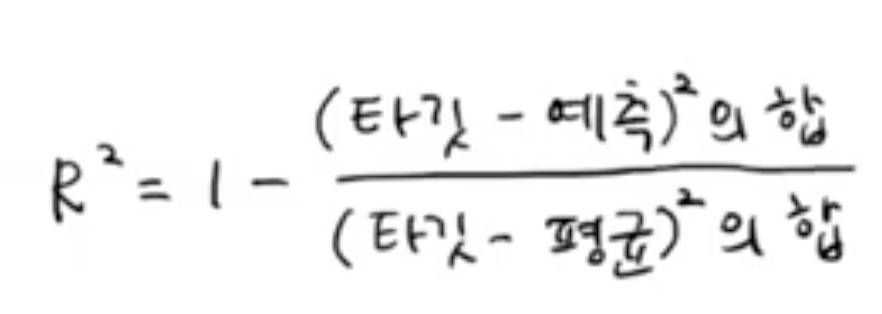

- 만약 타깃의 평균 정도를 예측하는 수준이라면 (즉 분자와 분모가 비슷해져) R2는 0에 가까워지고, 예측이 타깃에 아주 가까워 지면(분자가 0에 가까워지기 때문에) 1에 가까운 값이 된다.
- 위와 같이 0.99이면 아주 좋은 값지만, 정확도처럼 R2 스코어가 직감적으로 얼마나 좋은지 이해하기는 어렵다. 대신 타깃과 예측한 값 사이의 차이를 구해 보면 어느 정도 예측이 벗어나는지 가늠하기 좋다.
- 사이킷런 sklearn.metrics 패키지 중 **mean_absolute_error(MAE, 평균제곱오차)**는 타깃과 예측의 절대값 오차를 평균하여 반환한다.

In [16]:
# 평균제곱오차로 타깃과 예측의 절대값 오차를 평균으로 반환하기 

# 패키지 임포트 
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만든다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


- 계산 결과 에측이 평균적으로 19g 정도 타깃값과 다르다는 것을 알 수 있다. 
- 지금까지는 훈련 세트를 사용해 모델을 훈련하고 테스트 세트로 모델을 평가해보았다. 
- 이번에는 훈련세트를 사용해 평가해보도록 한다. (score() 메서드에 훈련 세트를 전달하여 점수를 출력)

## 4. 과대적합 VS 과소적합

In [17]:
# 앞에 훈련한 모델을 사용해서 훈련 세트의 R2 스코어를 확인
print(knr.score(train_input, train_target))

0.9698823289099254


- 앞에 테스트 세트 점수와 비교해봤을 때 훈련 세트 점수가 낮다. 
- 모델을 훈련 세트에 훈련하면 훈련 세트에 잘 맞는 모델이 만들어진다, 이 모델을 훈련 세트와 테스트 세트에서 평가하면 두 값 중 보통 훈련 세트의 점수가 조금 더 높게 나온다. (왜냐하면 훈련 세트에서 모델을 훈련했으므로 훈련 세트에서 더 좋은 점수가 나와야 하기 때문)
- 만약 훈련 세트에서 점수가 좋은데, 테스트 세트에서 점수가 나쁘다면, 모델이 훈련 세트에 **과대적합(overfitting)** 되었다, 즉 훈련 세트에만 잘 맞는 모델이라 테스트 세트와 나중에 실전에 투입시 새로운 샘플에 대한 예측으르 만들 때 잘 동작하지 않는다 라는 의미가 된다.
- 반대로 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우, 모델이 훈련세트에 **과소적합(underfitting)** 되었다, 즉 모델이 너무 단순해 훈련 세트에 적절히 훈련되지 않은 경우를 말한다.
- 참고로 해당 예제 모델은 **과소적합** 되었는데, 훈련 세트와 테스트세트의 크기가 매우 작기 때문이다.
- 예제 모델의 **과소적합** 문제를 해결하고 싶으면, 모델을 조금 더 복잡하게 만들면 된다. 즉 훈련 세트에 더 잘 맞게 만들면 테스트 세트의 점수는 조금 낮아질 것이다.
- K-최근접 이웃 알고리즘으로 모델을 더 복잡하게 만드는 방법은 이웃의 개수 K를 줄이는 것이다. 이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해지고, 이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따른다. 여기서 사이킷런의 K-최근접 이웃 알고리즘의 기본값은 5이다. 여기 예제에서 K를 3으로 낮춰보자

In [18]:
# 이웃의 개수를 3으로 설정 - n_neighbors = 3
knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [19]:
# 바교를 위해 테스트 세트 점수 확인
print(knr.score(test_input, test_target))

0.9746459963987609


- 이웃의 개수를 낮추니 훈련 세트의 R2 스코어가 0.96 -> 0.98로 높아졌다. 비교를 위해 테스트 세트의 R2 스코어를 확인해보니 0.99 -> 0.97로 낮아졌다.
- 예상대로 테스트 세트의 점수는 훈련 세트보다 낮아졌으므로, 과소적합 문제를 해결을 한 것으로 보인다. 또한 두 점수차이가 크지 않으므로 이 모델이 과대적합 된 것 같지도 않아 보인다. 해당 모델이 테스트 세트와 추가될 농어 데이터에도 일반화를 잘하리라고 예상할 수 있다.

### 문제 해결 과정 및 결론 
- 문제 해결 과정 및 정리 
    - K-최근접 이웃 회귀 모델은 분류와 동일하게 가장 먼저 가까운 K개의 이웃을 찾지만 차이점은 회귀 모델은 **샘플의 타깃값을 평균하여 이 샘플의 예측값으로 사용한다는 점**이다.
    - 사이킷런은 회귀 모델의 점수로 **R2(결정계수)스코어를 반환**한다. 이 값은 1에 가까울수록 좋다.
    - 정량적인 편가를 하고 싶다면 사이킷런에서 쟁공하는 **MSE(mean_absolute_error, 평균제곱오차)를 사용**한다.
    - 모델을 훈련하고 나서 훈련 세트와 테스트 세트에 대한 평가 점수를 구할수 있다. 훈련 세트의 점수와 테스트 세트의 점수 차이가 크면 좋지 않다. 일반적으로 **훈련 세트의 점수가 테스트 세트의 점수보다 조금 더 높다.**
    - 만약 테스트 세트의 점수가 너무 낮다면 모델이 훈련 세트에 과도하게 맞춰진 것이다. 이를 **과대적합** 이라고 한다. 반대로 테스트 세트 점수가 너무 높거나 두 점수가 모두 낮으면 이를 **과소적합** 이라고 한다.
    - 과대적합일 경우 모델을 덜 복잡하게 만들어야 한다. -> K-최근접 이웃일 경우 K값을 늘린다.
    - 과소적합일 경우 모델을 복잡하게 만들어야 한다. -> K-최근접 이웃일 경우 K값을 줄인다.
- 결론
    - 예제 모델을 훈련해보니 테스트 세트 점수가 높고 훈련 세트 점수가 낮은 과소적합 문제가 발생하였다.
    - 모델을 복잡하게 만들기 위해 K값을 3으로 줄여 모델을 다시 훈련 시켰다.
    - 결과 훈련 세트의 R2 스코어가 0.96 -> 0.98로 높아졌고, 테스트 세트 R2 스코어가 0.99 -> 0.97로 낮아져, 과소적합 문제를 해결 하였다.
    - 또한 두 점수차이가 크지 않으므로 이 모델이 또한 과대적합 되지 않은 것으로 보여, 추후 추가될 논어 데이터에도 일반화를 잘할 것이라는 결론이 도출 되었다.

### 확인 문제 2번 확인 

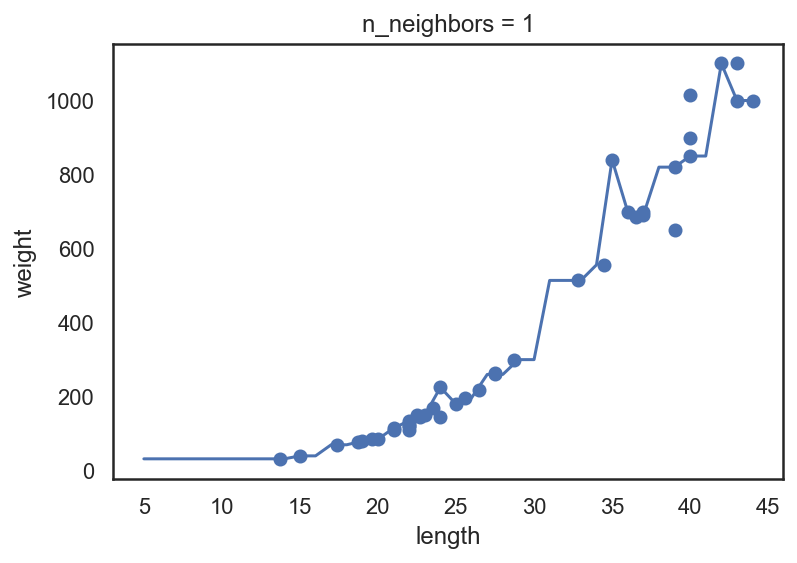

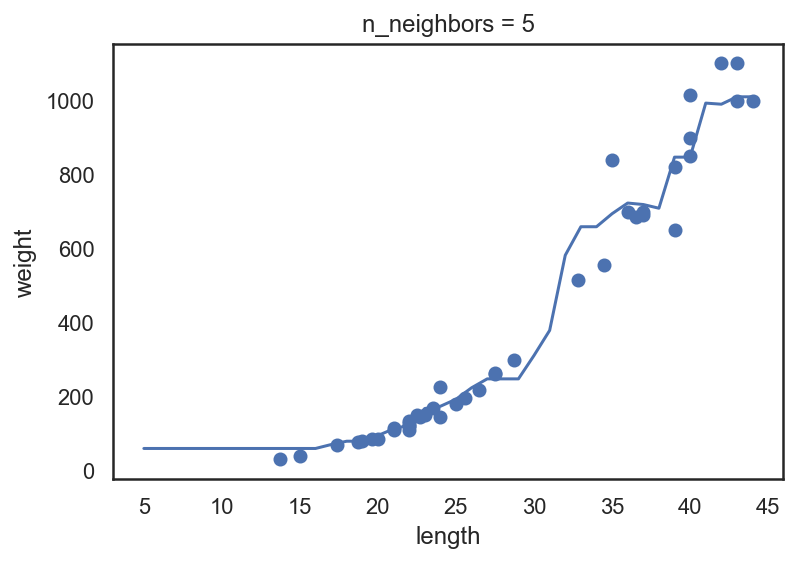

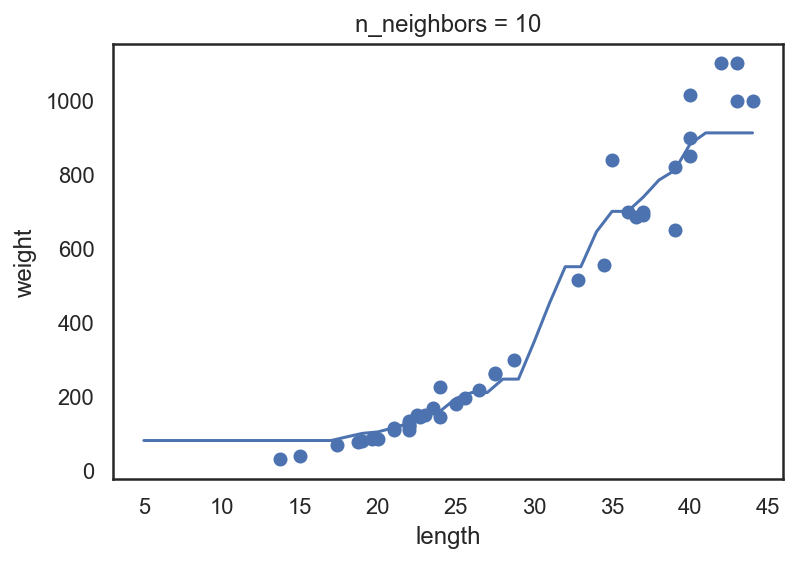

In [24]:
# K-최근접 이웃 회귀 객체를 만듬
knr = KNeighborsRegressor()

# 5에서 45까지 x 좌표를 만들기 
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그림
for n in [1, 5, 10]:
    # 모델을 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측을 구함
    prediction = knr.predict(x)
    
    # 훈련 세트와 예측 결과를 그래프로 나타냄
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()